In [3]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [18]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_model_names

lcset_name = 'test'
rootdir = '../save'
method = 'spm-mcmc-estw'
cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
kf = '1'

model_names = get_model_names(rootdir, cfilename, kf, lcset_name)
#model_names = [mn for mn in model_names if 'SelfAttn' in mn]
#model_names = [mn for mn in model_names if 'kernel_size=5' in mn]
model_names

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['mdl=ParallelRNN~input_dims=2~enc-emb=g64-g64.r64-r64~dec-emb=g1-g128.r1-r128~cell=GRU~b=64~s_precomputed_copies=0',
 'mdl=ParallelTimeModAttn~input_dims=1~m=4~kernel_size=1~fourier_dims=0.5~time_noise_window=0*24**-1~enc-emb=g64-g64.r64-r64~dec-emb=g1-g128.r1-r128~b=64~s_precomputed_copies=0']

No handles with labels found to put in legend.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
mdl=ParallelRNN~input_dims=2~enc-emb=g64-g64.r64-r64~dec-emb=g1-g128.r1-r128~cell=GRU~b=64~s_precomputed_copies=0 ['id=1000c0'](1#)
mdl=ParallelTimeModAttn~input_dims=1~m=4~kernel_size=1~fourier_dims=0.5~time_noise_window=0*24**-1~enc-emb=g64-g64.r64-r64~dec-emb=g1-g128.r1-r128~b=64~s_precomputed_copies=0 ['id=1000c0', 'id=1000c1'](2#)


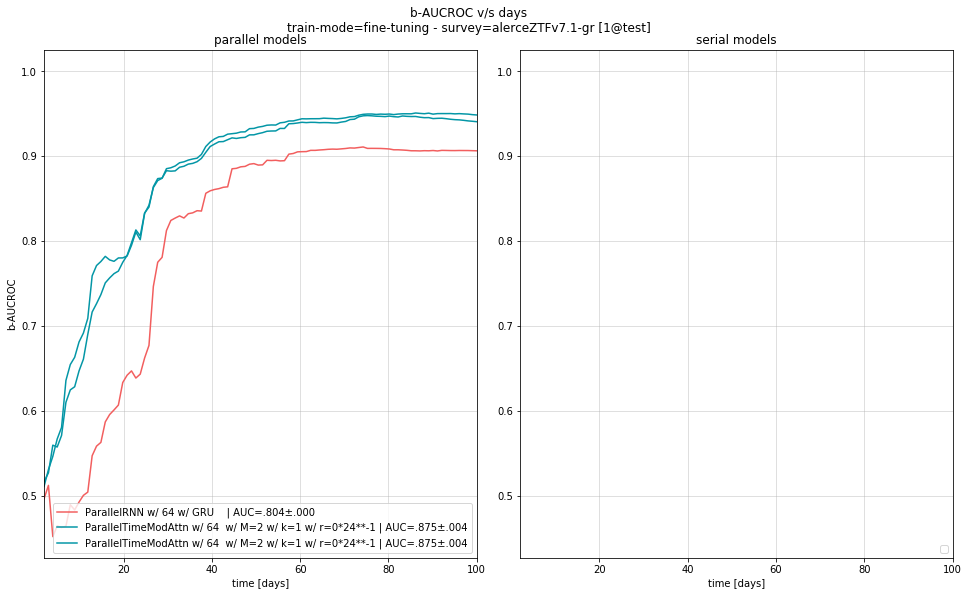

No handles with labels found to put in legend.


mdl=ParallelRNN~input_dims=2~enc-emb=g64-g64.r64-r64~dec-emb=g1-g128.r1-r128~cell=GRU~b=64~s_precomputed_copies=0 ['id=1000c0'](1#)
mdl=ParallelTimeModAttn~input_dims=1~m=4~kernel_size=1~fourier_dims=0.5~time_noise_window=0*24**-1~enc-emb=g64-g64.r64-r64~dec-emb=g1-g128.r1-r128~b=64~s_precomputed_copies=0 ['id=1000c0', 'id=1000c1'](2#)


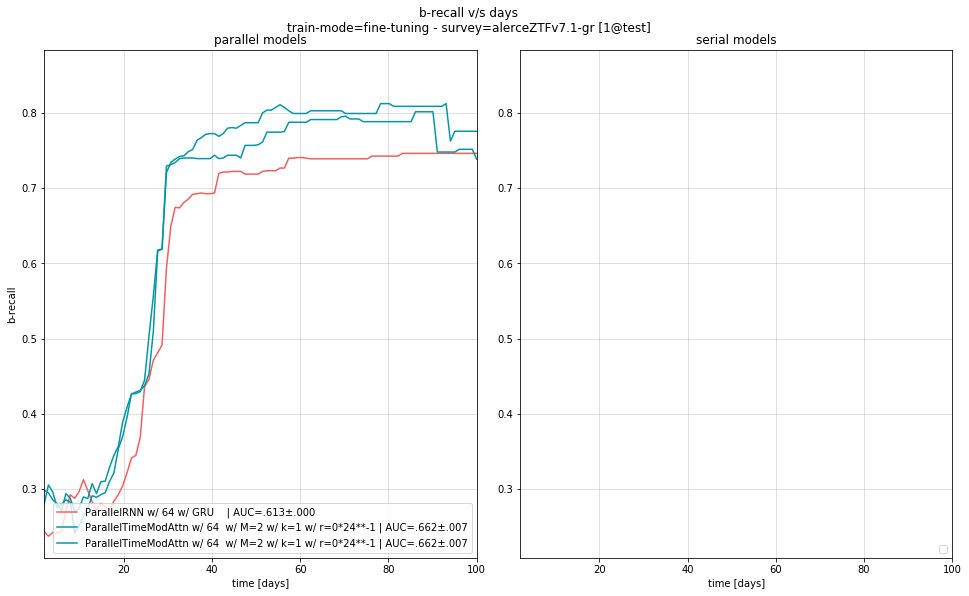

No handles with labels found to put in legend.


mdl=ParallelRNN~input_dims=2~enc-emb=g64-g64.r64-r64~dec-emb=g1-g128.r1-r128~cell=GRU~b=64~s_precomputed_copies=0 ['id=1000c0'](1#)
mdl=ParallelTimeModAttn~input_dims=1~m=4~kernel_size=1~fourier_dims=0.5~time_noise_window=0*24**-1~enc-emb=g64-g64.r64-r64~dec-emb=g1-g128.r1-r128~b=64~s_precomputed_copies=0 ['id=1000c0', 'id=1000c1'](2#)


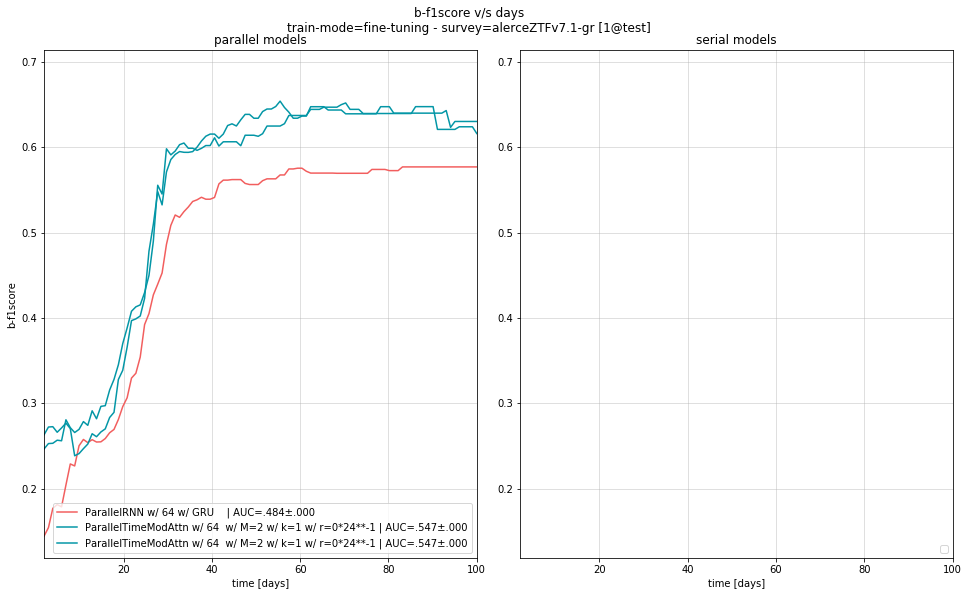

In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from lcclassifier.results.plots import plot_metric

dmetrics = {
    f'b-rocauc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-precision':{'k':1, 'mn':None},
    f'b-recall':{'k':1, 'mn':None},
    f'b-f1score':{'k':1, 'mn':None},
    #f'b-prauc':{'k':1, 'mn':'b-AUCPR'},
    }
kwargs = {
    #'baselines_dict':baselines_dict,
    'p':None, # None 5 10 25 30 50
}
plot_metric(rootdir, cfilename, kf, lcset_name, model_names, dmetrics, **kwargs)

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def f_relu(x, dim:int):
    return F.relu(x)

a = torch.Tensor([-1,2,3,4,5,8])
a = f_relu(a, 0)
a

tensor([0., 2., 3., 4., 5., 8.])

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_ps_performance_df
from fuzzytools.latex.latex_tables import LatexTable

dmetrics = {
    f'b-precision':{'k':1, 'mn':None},
    f'b-recall':{'k':1, 'mn':None},
    f'b-f1score':{'k':1, 'mn':None},
    f'b-rocauc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-prauc':{'k':1, 'mn':'b-AUCPR'},
    }
kwargs = {
    'uses_avg':False, # False True
    'day':100,
    #'override_model_name':False, # False True
    'baseline_filedir':f'../temp/baseline~mode=all.df',
    }
info_df = get_ps_performance_df(rootdir, cfilename, kf, lcset_name, model_names, dmetrics, **kwargs)

for k in range(0, len(info_df)):
    info_df.indexs[k] = info_df.indexs[k].replace('=', '***').replace('model***', 'model=')
display(info_df())

caption = ''
caption += f'Baseline method v/s deep learning models.'
latex_kwargs = {
    'centered':False,
    'caption':caption,
    'label':'?',
    'bold_axis':'columns',
    'repr_replace_dict':{'***':'='},
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ids=['id=1000c0', 'id=1000c1', 'id=1000c2', 'id=1000c3', 'id=1000c4'](n=5#) - model=mdl=SerialTimeModAttn~input_dims=2~m=4~kernel_size=1~fourier_dims=0.5~time_noise_window=24*24**-1~enc-emb=64-64~dec-emb=g1-g64.r1-r64~b=64~s_precomputed_copies=0
100%|██████████, 100.0/100.0 [days]


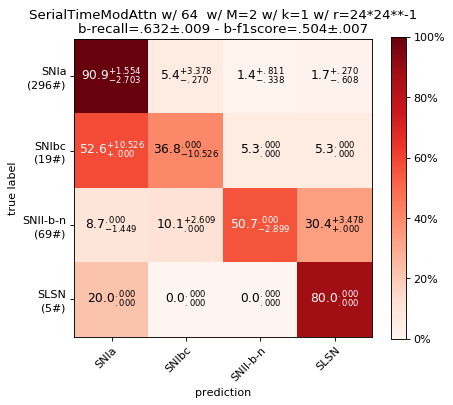

ids=['id=1000c0', 'id=1000c1', 'id=1000c2', 'id=1000c3', 'id=1000c4'](n=5#) - model=mdl=SerialRNN~input_dims=3~enc-emb=64-64~dec-emb=g1-g64.r1-r64~cell=GRU~b=64~s_precomputed_copies=0
100%|██████████, 100.0/100.0 [days]


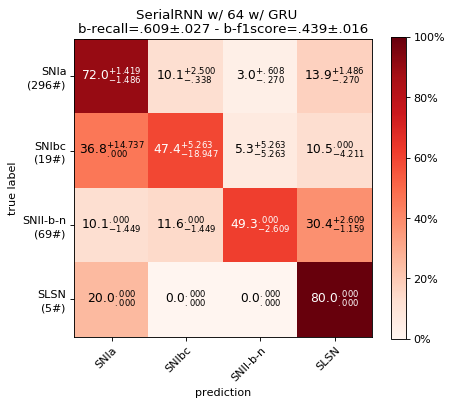

ids=['id=1000c0', 'id=1000c1', 'id=1000c2'](n=3#) - model=mdl=SerialTimeModAttn~input_dims=2~m=4~kernel_size=1~fourier_dims=0.5~time_noise_window=0*24**-1~enc-emb=64-64~dec-emb=g1-g64.r1-r64~b=64~s_precomputed_copies=0
100%|██████████, 100.0/100.0 [days]


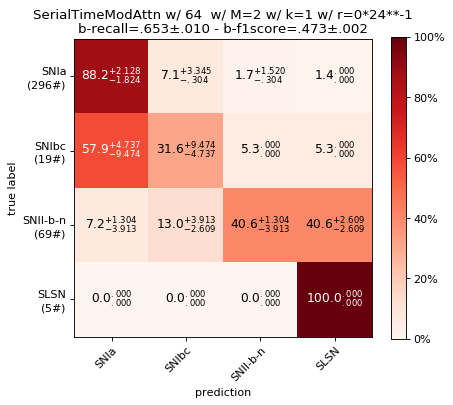

ids=['id=1000c0', 'id=1000c1'](n=2#) - model=mdl=ParallelTimeModAttn~input_dims=2~m=4~kernel_size=1~fourier_dims=0.5~time_noise_window=0*24**-1~enc-emb=g32-g32.r32-r32~dec-emb=g1-g64.r1-r64~b=64~s_precomputed_copies=0
100%|██████████, 100.0/100.0 [days]


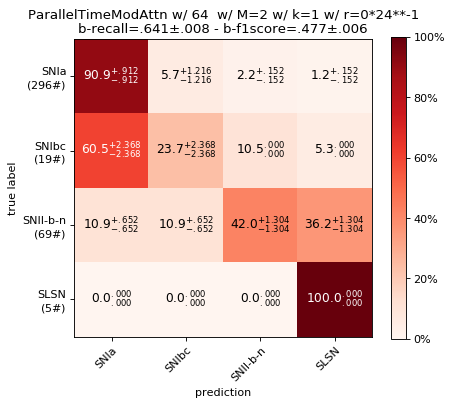

ids=[](n=0#) - model=mdl=ParallelRNN~input_dims=3~enc-emb=g32-g32.r32-r32~dec-emb=g1-g64.r1-r64~cell=LSTM~b=64~s_precomputed_copies=0
ids=[](n=0#) - model=mdl=SerialRNN~input_dims=3~enc-emb=64-64~dec-emb=g1-g64.r1-r64~cell=LSTM~b=64~s_precomputed_copies=0
ids=['id=1000c0', 'id=1000c1', 'id=1000c2', 'id=1000c3', 'id=1000c4'](n=5#) - model=mdl=ParallelTimeModAttn~input_dims=2~m=4~kernel_size=1~fourier_dims=0.5~time_noise_window=24*24**-1~enc-emb=g32-g32.r32-r32~dec-emb=g1-g64.r1-r64~b=64~s_precomputed_copies=0
100%|██████████, 100.0/100.0 [days]


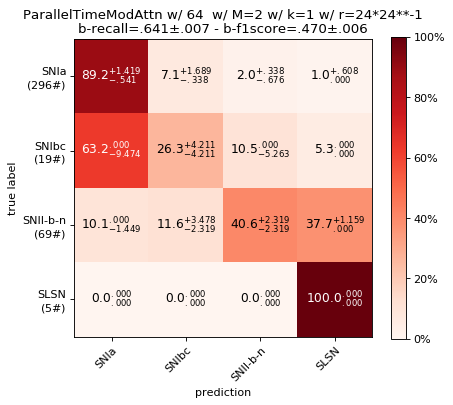

ids=['id=1000c0', 'id=1000c1', 'id=1000c2', 'id=1000c3', 'id=1000c4'](n=5#) - model=mdl=ParallelRNN~input_dims=3~enc-emb=g32-g32.r32-r32~dec-emb=g1-g64.r1-r64~cell=GRU~b=64~s_precomputed_copies=0
100%|██████████, 100.0/100.0 [days]


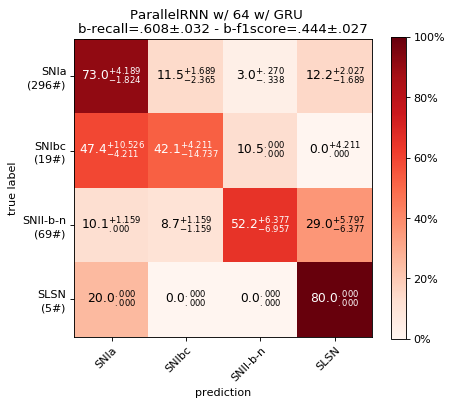

In [12]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_cm

lcset_name = 'test'
kwargs = {
    'export_animation':False, # False True
}
plot_cm(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_temporal_encoding

lcset_name = f'train.{method}'
kwargs = {
    }
plot_temporal_encoding(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_ps_times_df
from fuzzytools.latex.latex_tables import LatexTable
from fuzzytools.lists import get_min_elements

kwargs = {
    }
info_df = get_ps_times_df(rootdir, cfilename, kf, method, model_names, **kwargs)

for k in range(0, len(info_df)):
    info_df.indexs[k] = info_df.indexs[k].replace('=', '***').replace('model***', 'model=')
display(info_df())

caption = ''
caption += f'Training optimization times from all autoencoder models iterations. Validation set evaluation is included in total time.'
latex_kwargs = {
    #'centered':
    'caption':caption,
    'label':'?',
    'bold_axis':'columns',
    #'hline_k':3,
    'repr_replace_dict':{'***':'='},
    'bold_function':get_min_elements,
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)